In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

import sys

sys.path.append("../")
import loss_functions as ls
from linear_regression import LinearRegression

from sklearn.model_selection import train_test_split

In [11]:
# Generate some simple mock data
np.random.seed(42)  # For reproducibility

# Step 1: Define parameters for the line
m = 2  # Slope
b = 5  # Intercept

# Step 2: Generate some input values (e.g., 500 data points)
x = np.linspace(0, 10, 500)  # 500 values between 0 and 10

# Step 3: Generate the corresponding output values using the line equation with noise
noise = np.random.randn(500)  # Add random noise
y = m * x + b + noise  # y = mx + b + noise

# Step 4: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Reshape the training data into batches
batch_size = 10  # Define the batch size
n_samples = x_train.shape[0]
n_batches = n_samples // batch_size  # Number of batches

# Reshape the training data into batches
x_train_batches = x_train[: n_batches * batch_size].reshape((n_batches, batch_size, 1))
y_train_batches = y_train[: n_batches * batch_size].reshape((n_batches, batch_size, 1))

x_test_batches = x_test.reshape((x_test.shape[0], 1))
y_test_batches = y_test.reshape((y_test.shape[0], 1))

print("X Train Batches:", x_train_batches.shape)
print("Y Train Batches:", y_train_batches.shape)

X Train Batches: (40, 10, 1)
Y Train Batches: (40, 10, 1)



Training the model with 40 batches
Train input shape: (40, 10, 1)
Train output shape: (40, 10, 1)
Epoch 0: Loss 27.833763797584034
Epoch 1: Loss 6.13047483726441
Epoch 2: Loss 5.829277688237314
Epoch 3: Loss 5.645931812315248
Epoch 4: Loss 5.471428730739534
Epoch 5: Loss 5.303535127116347
Epoch 6: Loss 5.141905512381407
Epoch 7: Loss 4.9863004045851165
Epoch 8: Loss 4.836494894584796
Epoch 9: Loss 4.692272802185643
Epoch 10: Loss 4.553426025730573
Epoch 11: Loss 4.419754221053215
Epoch 12: Loss 4.291064511122872
Epoch 13: Loss 4.167171207660639
Epoch 14: Loss 4.047895543201767
Epoch 15: Loss 3.9330654131486966
Epoch 16: Loss 3.8225151274383378
Epoch 17: Loss 3.716085171465008
Epoch 18: Loss 3.6136219759140493
Epoch 19: Loss 3.514977695174013
Epoch 20: Loss 3.420009994007688
Epoch 21: Loss 3.3285818421741253
Epoch 22: Loss 3.2405613167053415
Epoch 23: Loss 3.1558214115524135
Epoch 24: Loss 3.074239854326264
Epoch 25: Loss 2.995698929868736
Epoch 26: Loss 2.9200853103993727
Epoch 27: Lo

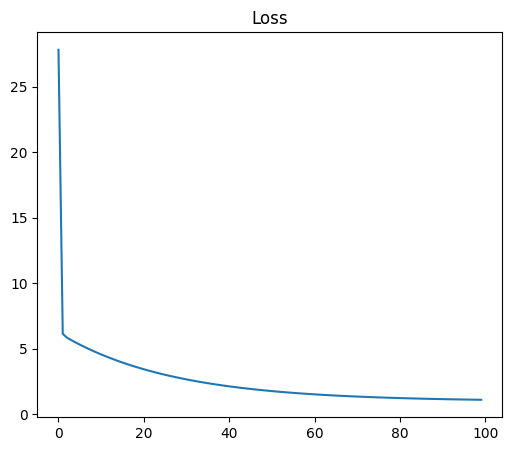

In [12]:
# Step 5: Create a Linear Regression model
model = LinearRegression(1)

# Step 6: Train the model using the batched data (we'll train using the full x_train in practice)
print(f"\nTraining the model with {n_batches} batches")
print(f"Train input shape: {x_train_batches.shape}")
print(f"Train output shape: {y_train_batches.shape}")
loss, line_history = model.train(x_train_batches, y_train_batches, lr=0.01, epochs=100)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(loss)
ax.set_title("Loss")
plt.show()

(100, 2)


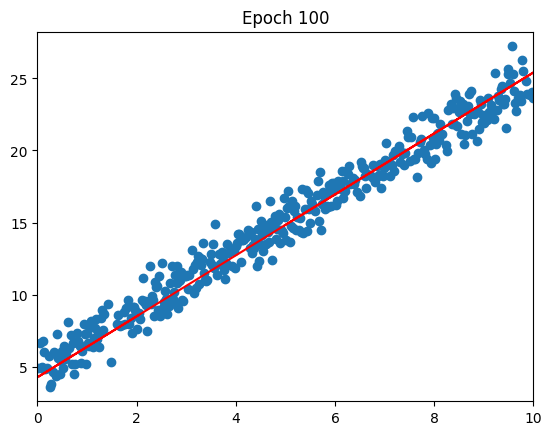

In [16]:
print(np.array(line_history).shape)

# Extract weights and biases from line_history
weights = [params[0] for params in line_history]
biases = [params[1] for params in line_history]

fig, ax = plt.subplots()
(line,) = ax.plot([], [], "r-", label="Model")
scatter = ax.scatter(x_train, y_train, label="Training Data")
title = ax.set_title("")


def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(min(y_train) - 1, max(y_train) + 1)
    line.set_data([], [])
    title.set_text("")
    return line, title


def update(frame):
    w = weights[frame]
    b = biases[frame]
    y_pred = w * x_train + b
    line.set_data(x_train, y_pred)
    title.set_text(f"Epoch {frame + 1}")
    return line, title


ani = animation.FuncAnimation(
    fig, update, frames=len(weights), init_func=init, blit=True
)

ani.save("linear_regression.gif", writer="pillow", fps=10)
pass

In [17]:
# Step 7: Make predictions on the test set
print("\nMaking predictions on the test set")
print(f"Test input shape: {x_test_batches.shape}")
y_pred = model.predict(x_test_batches)

# Step 8: Plot the results
y_pred_train = model.predict(x_train.reshape(-1, 1))
y_pred_test = model.predict(x_test.reshape(-1, 1))


Making predictions on the test set
Test input shape: (100, 1)


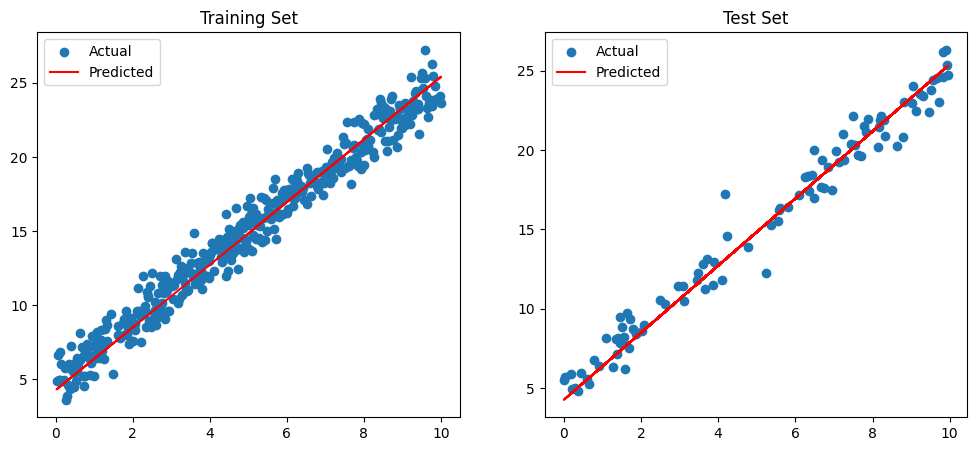

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Training set plot
ax[0].scatter(x_train, y_train, label="Actual")
ax[0].plot(x_train, y_pred_train, color="red", label="Predicted")
ax[0].set_title("Training Set")
ax[0].legend()

# Test set plot
ax[1].scatter(x_test, y_test, label="Actual")
ax[1].plot(x_test, y_pred_test, color="red", label="Predicted")
ax[1].set_title("Test Set")
ax[1].legend()

plt.show()